In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
df1 = pd.read_csv('diabetes.csv', index_col =0)

In [3]:
df1.head(3)

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
PatientID,,,,,,,,,
1354778,0,171,80,34,23,43.509726,1.213191,21,0
1147438,8,92,93,47,36,21.240576,0.158365,23,0
1640031,7,115,47,52,35,41.511523,0.079019,23,0


In [4]:
df1.shape

(15000, 9)

In [5]:
df2 = pd.read_csv('doctors.csv', index_col =0)

In [6]:
df2.head(3)

,Physician
PatientID,
1000038,Jeanne Vestergaard
1000069,Sheldon Comeaux
1000118,Brain Dulaney


In [7]:
df = df1.join(df2, how = 'left')

In [8]:
df['Age_Ln'] = df.loc[:,'Age'].apply(lambda z: np.log(z))

In [25]:
cols = ['PlasmaGlucose','BMI', 'TricepsThickness', 'DiastolicBloodPressure']
col = ['Pregnancies', 'SerumInsulin', 'DiabetesPedigree','Age', 'Age_Ln',]

<IPython.core.display.Javascript object>


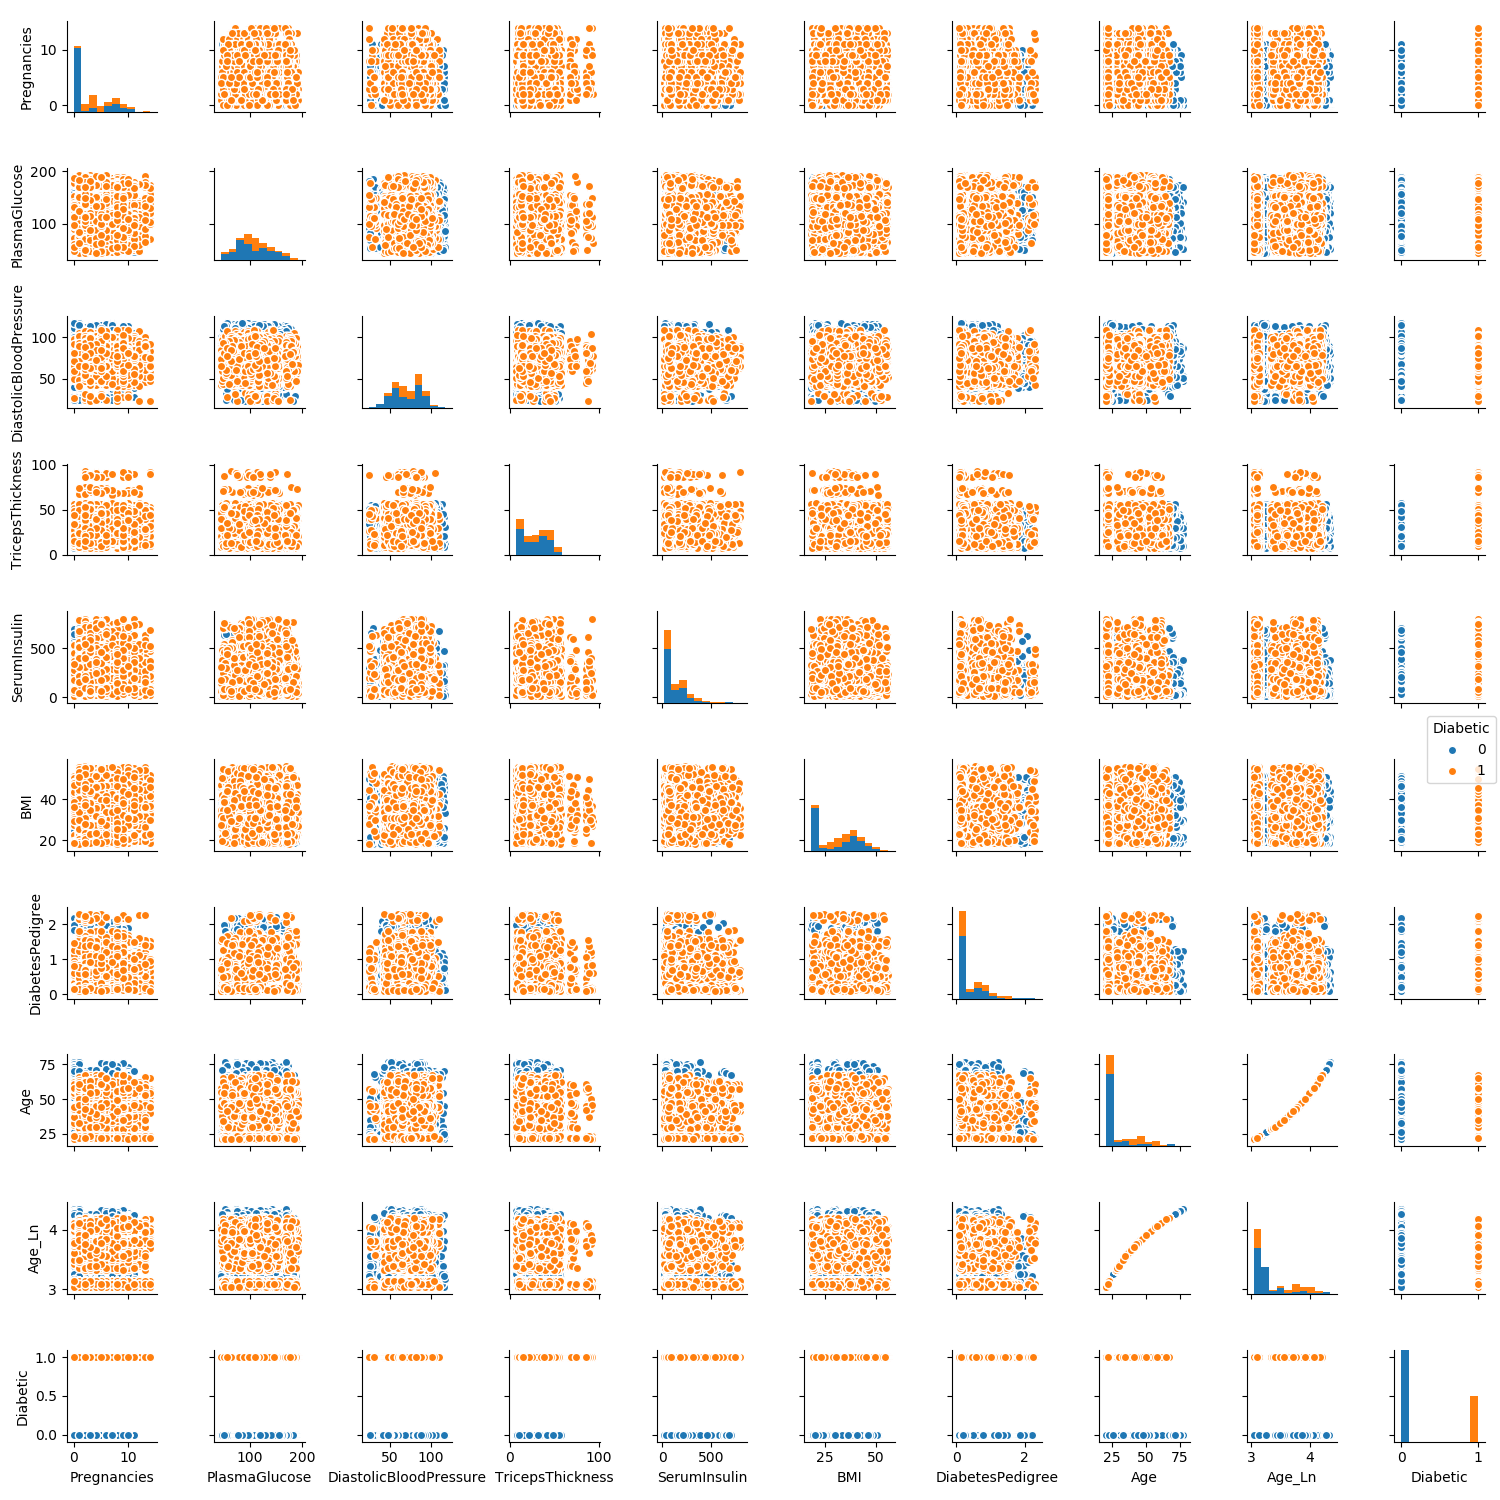

In [19]:
sbn.pairplot(df[cols], hue='Diabetic', size = 1.5)

In [26]:
from sklearn import preprocessing as prep
df[cols] = prep.StandardScaler().fit_transform(df[cols])
df[col] = prep.MinMaxScaler().fit_transform(df[col])

In [28]:
df.head(3)

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Physician,Age_Ln
PatientID,,,,,,,,,,,
1000038,0.000000,0.285893,1.001264,0.218890,0.755414,1.270317,0.329556,0.035714,0,Jeanne Vestergaard,0.070017
1000069,0.214286,-0.996121,0.583557,-0.674259,0.042038,0.539575,0.002766,0.303571,0,Sheldon Comeaux,0.456455
1000118,0.000000,1.130147,1.418971,-1.498705,0.025478,0.595154,0.039658,0.000000,0,Brain Dulaney,0.000000


In [29]:
df = df.drop(axis = 1, labels='Physician')

In [32]:
df = df[['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age', 'Age_Ln',
       'Diabetic']]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:9]], df[df.columns[-1]], test_size = 0.3)

In [36]:
from sklearn import tree as dt

clf = dt.DecisionTreeClassifier().fit(np.array(df[df.columns[:9]]), np.array(df[df.columns[-1]]))

In [66]:
import graphviz
dot_data = dt.export_graphviz(clf, out_file=None,
                             feature_names=df.columns[:9],
                             class_names=['Non-Diabetic', 'Diabetic'], 
                             filled=True,
                             rounded=True,
                             special_characters=True)
graph = graphviz.Source(dot_data)
#graph.render('Diabetes Classifier')

In [67]:
graph

In [78]:
score = clf.score(X_train, y_train)
print ('Train Accuracy --',str(score*100)+'%')

Train Accuracy -- 100.0%


In [79]:
score = clf.score(X_test, y_test)
print ('Test Accuracy --',str(score*100)+'%')

Test Accuracy -- 100.0%


# Model Evaluation

In [89]:
np.sum(np.abs(y_test - clf.predict(X_test))) # This model got all predictions right 

0

In [90]:
# predict the class of each patient in the test set (0 --> Non diabetic, 1 --> Diabetic)
y_pred_class = clf.predict(X_test)

In [93]:
# Compute accuracy of the classifier
from sklearn import metrics
print('Classification accuracy is  --',str(metrics.accuracy_score(y_test, y_pred_class)*100) + '%')

Classification accuracy is  -- 100.0%


### Null Accuracy
Null accuracy is the accuracy that would be obtained by always predicting the most frequent class in the testing set.

In [94]:
y_test.value_counts() # Counts the number of distinct items in series

0    2973
1    1527
Name: Diabetic, dtype: int64

In [96]:
# This gives the % of testing set that are 1s or Diabetic
y_test.mean()

0.3393333333333333

In [97]:
# This gives the % of testing set that are 0s or Non-Diabetic
1 - y_test.mean() # This represents the null accuracy

0.6606666666666667

In [116]:
# Null Accuracy for any given number of classification is given by:
print('Null Accuracy -- ',str(round(y_test.value_counts().head(1)[0]/len(y_test) * 100))+'%')

Null Accuracy --  66.0%


## Confusion matrix

In [113]:
# Confusion matrixs using test set data
metrics.confusion_matrix(y_test, y_pred_class)

array([[2973,    0],
       [   0, 1527]], dtype=int64)

In [138]:
# Confusion matrix using train set data
metrics.confusion_matrix(y_train, clf.predict(X_train))

array([[7027,    0],
       [   0, 3473]], dtype=int64)

In [141]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1,1]
TN = confusion[0,0]
FN = confusion[1,0]
FP = confusion[0,1]

print('Classification Accuracy --- ', str((TP+TN)/(TP+TN+FP+FN) * 100) + '%')
#print('Classification Accuracy ---', str(metrics.accuracy_score(y_test, y_pred_class)*100)+'%')

 ### Sensitivity/ Recall/ TPRate

print('Sensitivity -- ', TP/(TP + FN))
#print('Sensitivity -- ', metrics.recall_score(y_test, y_pred_class))

### Specificity/ TNRate

print('Specificity -- ', TN/(TN + FP))

### False Positive Rate

#print('False Positive rate --', FP/(TN + FP))

### Precision

print('Precision -- ',TP/(TP+FP))

Classification Accuracy ---  100.0%
Sensitivity --  1.0
Specificity --  1.0
Precision --  1.0


### This is a very good classifier for diabetes 
# This is not a doctor. Make sure you see one